<a href="https://colab.research.google.com/github/Akansh-Verma/CropXcel/blob/main/CropXcel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Load libraries**

In [ ]:
from tensorflow import keras 
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Model, Sequential,load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 horizontal_flip=True,shear_range=.2,rotation_range=.2)
test_datagen=ImageDataGenerator(rescale=1./255)

training_set=train_datagen.flow_from_directory("/content/drive/MyDrive/project_new/train/",
                                               target_size=(224,224),class_mode="categorical",batch_size=50,shuffle=True)
test_set=test_datagen.flow_from_directory("/content/drive/MyDrive/project_new/valid/",
                                          target_size=(224,224),batch_size=50,class_mode="categorical",shuffle=True)

Found 18365 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


In [ ]:
vgg16=VGG16(include_top=False,weights="imagenet",input_shape=[224,224,3])

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
for layer in vgg16.layers:
  layer.trainable=False

In [ ]:
folder=glob("/content/drive/MyDrive/project_new/train/*")
folder

['/content/drive/MyDrive/project_new/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/drive/MyDrive/project_new/train/Tomato___Septoria_leaf_spot',
 '/content/drive/MyDrive/project_new/train/Tomato___healthy',
 '/content/drive/MyDrive/project_new/train/Tomato___Late_blight',
 '/content/drive/MyDrive/project_new/train/Tomato___Tomato_mosaic_virus',
 '/content/drive/MyDrive/project_new/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/drive/MyDrive/project_new/train/Tomato___Early_blight',
 '/content/drive/MyDrive/project_new/train/Tomato___Bacterial_spot',
 '/content/drive/MyDrive/project_new/train/Tomato___Target_Spot',
 '/content/drive/MyDrive/project_new/train/Tomato___Leaf_Mold']

In [ ]:
x=Flatten()(vgg16.output)
pred_vgg16=Dense(units=len(folder),activation="softmax")(x)
vgg16_model=Model(inputs=vgg16.input,outputs=pred_vgg16)

In [ ]:
vgg16_model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

## Final Architecture

In [ ]:
vgg16_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
transfer_vgg16 = vgg16_model.fit(
    training_set,
    validation_data=test_set,
    epochs=20,
    validation_steps=len(test_set),
    steps_per_epoch=len(training_set)
)

Epoch 1/20
368/368 [==============================] - 13280s 36s/step - loss: 0.6868 - accuracy: 0.7748 - val_loss: 0.3862 - val_accuracy: 0.8704
Epoch 2/20
368/368 [==============================] - 287s 781ms/step - loss: 0.3097 - accuracy: 0.8978 - val_loss: 0.3900 - val_accuracy: 0.8641
Epoch 3/20
368/368 [==============================] - 282s 766ms/step - loss: 0.2193 - accuracy: 0.9268 - val_loss: 0.2898 - val_accuracy: 0.8990
Epoch 4/20
368/368 [==============================] - 277s 752ms/step - loss: 0.1563 - accuracy: 0.9491 - val_loss: 0.2277 - val_accuracy: 0.9287
Epoch 5/20
368/368 [==============================] - 282s 766ms/step - loss: 0.1283 - accuracy: 0.9598 - val_loss: 0.2193 - val_accuracy: 0.9278
Epoch 6/20
368/368 [==============================] - 279s 759ms/step - loss: 0.1198 - accuracy: 0.9629 - val_loss: 0.2203 - val_accuracy: 0.9276
Epoch 7/20
368/368 [==============================] - 280s 759ms/step - loss: 0.0948 - accuracy: 0.9700 - val_loss: 0.1989 -

In [16]:
# Scores is just a list containing loss and accuracy value
scores=vgg16_model.evaluate(training_set)
scores2=vgg16_model.evaluate(test_set)
print("Training Loss is :"+str(scores[0]))
print("Training Accuracy is :"+str(scores[1]*100)+" %")
print("Validation Loss is :"+str(scores2[0]))
print("Validation Accuracy is :"+str(scores2[1]*100)+" %")

92/92 [==============================] - 22s 236ms/step - loss: 0.2026 - accuracy: 0.9433
Training Loss is :0.008753802627325058
Training Accuracy is :99.8039722442627 %
Validation Loss is :0.20263639092445374
Validation Accuracy is :94.32933330535889 %


In [ ]:
test_steps_per_epoch = np.math.ceil(test_set.samples / test_set.batch_size)
predictions = vgg16_model.predict(test_set, steps=test_steps_per_epoch)

# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes and class Labels
true_classes = test_set.classes
class_labels = list(test_set.class_indices.keys())   

In [12]:
#Classification Report
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report) 

                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.09      0.10      0.10       425
                        Tomato___Early_blight       0.13      0.13      0.13       480
                         Tomato___Late_blight       0.11      0.11      0.11       463
                           Tomato___Leaf_Mold       0.08      0.09      0.08       470
                  Tomato___Septoria_leaf_spot       0.11      0.10      0.10       436
Tomato___Spider_mites Two-spotted_spider_mite       0.08      0.09      0.09       435
                         Tomato___Target_Spot       0.08      0.08      0.08       457
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.12      0.12      0.12       490
                 Tomato___Tomato_mosaic_virus       0.06      0.06      0.06       448
                             Tomato___healthy       0.08      0.08      0.08       481

                                     accu

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(true_classes,predicted_classes),annot=True,fmt='.5g') 

In [ ]:
# plot the loss
plt.plot(transfer_vgg16.history['loss'], label='train loss')
plt.plot(transfer_vgg16.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(transfer_vgg16.history['accuracy'], label='train acc')
plt.plot(transfer_vgg16.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
y_pred_vgg16=vgg16_model.predict(test_set)

In [ ]:
import numpy as np
y_pred_vgg16=np.argmax(y_pred_vgg16,axis=1)

In [14]:
vgg16_model.save("CropXcel.h5")
from tensorflow.keras.models import load_model
modelvgg16=load_model("CropXcel.h5")

Saving tomato.jpg to tomato.jpg
1/1 [==============================] - 1s 888ms/step
Tomato___Tomato_Yellow_Leaf_Curl_Virus


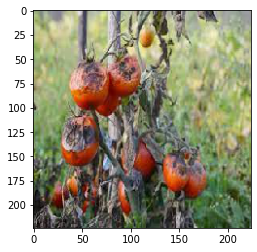

In [15]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  # predict images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224,224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis =0)

  preds = modelvgg16.predict(x)
  preds=np.argmax(preds, axis=1)
  if preds==0:
        preds="Tomato___Bacterial_spot"
  elif preds==1:
        preds="Tomato___Early_blight"
  elif preds==2:
        preds="Tomato___healthy"
  elif preds==3:
        preds="Tomato___Late_blight"
  elif preds==4:
        preds="Tomato___Leaf_Mold"
  elif preds==5:
        preds="Tomato___Septoria_leaf_spot"
  elif preds==6:
        preds="Tomato___Spider_mites Two-spotted_spider_mite"
  elif preds==7:
        preds="Tomato___Target_Spot"
  elif preds==8:
        preds="Tomato___Tomato_mosaic_virus"
  else:
        preds="Tomato___Tomato_Yellow_Leaf_Curl_Virus"
  print(preds)
  plt.imshow(img)